In [22]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
DATA_DIR = '/home/sha/books/Hands-On-Data-Preprocessing-in-Python/Chapter13'

In [6]:
toy_file = 'PCA_toy_dataset.xlsx'

In [7]:
toy_df = pd.read_excel(os.path.join(DATA_DIR, toy_file))
toy_df

,Dimension_1,Dimension_2
0,41,52
1,50,64
2,64,52
3,37,51
4,91,99
5,66,78
6,43,19
7,84,103
8,64,49
9,88,94


In [8]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(toy_df)

PCA()

In [9]:
toy_t_df = pd.DataFrame(pca.transform(toy_df))
toy_t_df.columns = ['PC1', 'PC2']
toy_t_df

,PC1,PC2
0,16.469846,-7.962674
1,1.476788,-8.418973
2,2.116506,10.009016
3,19.747457,-10.464127
4,-51.457824,1.775480
5,-19.447434,-4.653743
6,41.007198,14.194004
7,-50.214928,-6.190398
8,4.460640,11.881191
9,-45.678760,2.551638


In [10]:
data_file_name = 'WH Report_preprocessed.csv'
data_file = os.path.join(DATA_DIR, data_file_name)
report_df = pd.read_csv(data_file)
report_df

,Name,Continent,year,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,Asia,2010,29185507.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
1,Afghanistan,Asia,2011,30117413.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
2,Afghanistan,Asia,2012,31161376.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
3,Afghanistan,Asia,2013,32269589.0,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
4,Afghanistan,Asia,2014,33370794.0,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,Zimbabwe,Africa,2015,13814629.0,3.703,7.992,0.736,53.80,0.667,-0.123,0.810,0.715,0.179
1216,Zimbabwe,Africa,2016,14030390.0,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1217,Zimbabwe,Africa,2017,14236745.0,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1218,Zimbabwe,Africa,2018,14439018.0,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212


In [11]:
country_df = report_df.pivot(index='Name', columns='year', values=['Life_Ladder', 'Log_GDP_per_capita', 'Social_support', 'Healthy_life_expectancy_at_birth',
                                                                   'Freedom_to_make_life_choices', 'Generosity', 'Perceptions_of_corruption', 'Positive_affect',
                                                                   'Negative_affect'])

In [12]:
country_df

Life_Ladder                                                   \
year               2010   2011   2012   2013   2014   2015   2016   2017   
Name                                                                       
Afghanistan       4.758  3.832  3.783  3.572  3.131  3.983  4.220  2.662   
Albania           5.269  5.867  5.510  4.551  4.814  4.607  4.511  4.640   
Algeria           5.464  5.317  5.605  5.980  6.355  5.848  5.341  5.249   
Argentina         6.441  6.776  6.468  6.582  6.671  6.697  6.427  6.039   
Armenia           4.368  4.260  4.320  4.277  4.453  4.348  4.325  4.288   
...                 ...    ...    ...    ...    ...    ...    ...    ...   
Uruguay           6.062  6.554  6.450  6.444  6.561  6.628  6.171  6.336   
Uzbekistan        5.095  5.739  6.019  5.940  6.049  5.972  5.893  6.421   
Vietnam           5.296  5.767  5.535  5.023  5.085  5.076  5.062  5.175   
Zambia            4.999  4.999  5.013  5.244  4.346  4.843  4.348  3.933   
Zimbabwe          4.682  4.846  4.955  4.690  4.184  3.703  3.735  3.638   

                           ... Negative_affect                               \
year          2018   2019  ...            2010   2011   2012    2013   2014   
Name                       ...                                                
Afghanistan  2.694  2.375  ...           0.275  0.267  0.268  0.2730  0.375   
Albania      5.004  4.995  ...           0.300  0.257  0.271  0.3380  0.335   
Algeria      5.043  4.745  ...           0.255  0.255  0.230  0.2035  0.177   
Argentina    5.793  6.086  ...           0.211  0.232  0.272  0.2540  0.238   
Armenia      5.062  5.488  ...           0.426  0.459  0.464  0.4500  0.404   
...            ...    ...  ...             ...    ...    ...     ...    ...   
Uruguay      6.372  6.600  ...           0.231  0.252  0.214  0.2530  0.251   
Uzbekistan   6.205  6.154  ...           0.152  0.123  0.118  0.1300  0.106   
Vietnam      5.296  5.467  ...           0.216  0.193  0.221  0.1650  0.241   
Zambia       4.041  3.307  ...           0.204  0.204  0.250  0.3080  0.327   
Zimbabwe     3.616  2.694  ...           0.122  0.211  0.177  0.1820  0.239   

                                                
year          2015   2016   2017   2018   2019  
Name                                            
Afghanistan  0.339  0.348  0.371  0.405  0.502  
Albania      0.350  0.322  0.334  0.319  0.274  
Algeria      0.277  0.377  0.289  0.293  0.215  
Argentina    0.305  0.312  0.292  0.321  0.319  
Armenia      0.438  0.437  0.437  0.455  0.430  
...            ...    ...    ...    ...    ...  
Uruguay      0.300  0.283  0.280  0.275  0.222  
Uzbekistan   0.103  0.147  0.203  0.209  0.220  
Vietnam      0.232  0.223  0.207  0.191  0.186  
Zambia       0.382  0.372  0.387  0.351  0.394  
Zimbabwe     0.179  0.209  0.224  0.212  0.235  

[122 rows x 90 columns]

In [13]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, Afghanistan to Zimbabwe
Data columns (total 90 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Life_Ladder, 2010)                       122 non-null    float64
 1   (Life_Ladder, 2011)                       122 non-null    float64
 2   (Life_Ladder, 2012)                       122 non-null    float64
 3   (Life_Ladder, 2013)                       122 non-null    float64
 4   (Life_Ladder, 2014)                       122 non-null    float64
 5   (Life_Ladder, 2015)                       122 non-null    float64
 6   (Life_Ladder, 2016)                       122 non-null    float64
 7   (Life_Ladder, 2017)                       122 non-null    float64
 8   (Life_Ladder, 2018)                       122 non-null    float64
 9   (Life_Ladder, 2019)                       122 non-null    float64
 10  (Log_GDP_per_capita, 2010)  

In [14]:
Xs = country_df
Xs = (Xs - Xs.mean()) / Xs.std()
Xs

Life_Ladder                                                    \
year               2010      2011      2012      2013      2014      2015   
Name                                                                        
Afghanistan   -0.622104 -1.511427 -1.475323 -1.543065 -1.998271 -1.323126   
Albania       -0.190849  0.282957  0.020949 -0.744787 -0.576171 -0.772155   
Algeria       -0.026280 -0.202012  0.103257  0.420421  0.725942  0.323607   
Argentina      0.798253  1.084478  0.850959  0.911293  0.992956  1.073246   
Armenia       -0.951242 -1.134033 -1.010066 -0.968207 -0.881208 -1.000843   
...                 ...       ...       ...       ...       ...       ...   
Uruguay        0.478398  0.888727  0.835364  0.798768  0.900008  1.012322   
Uzbekistan    -0.337695  0.170091  0.461946  0.387805  0.467379  0.433095   
Vietnam       -0.168062  0.194781  0.042609 -0.359918 -0.347181 -0.358043   
Zambia        -0.418714 -0.482412 -0.409652 -0.179714 -0.971621 -0.563774   
Zimbabwe      -0.686244 -0.617321 -0.459903 -0.631447 -1.108508 -1.570357   

                                                     ... Negative_affect  \
year             2016      2017      2018      2019  ...            2010   
Name                                                 ...                   
Afghanistan -1.128955 -2.567462 -2.660826 -2.784707  ...        0.435211   
Albania     -0.871862 -0.824119 -0.564109 -0.543304  ...        0.768225   
Algeria     -0.138575 -0.287367 -0.528710 -0.757178  ...        0.168800   
Argentina    0.820884  0.408913  0.152042  0.390044  ...       -0.417305   
Armenia     -1.036190 -1.134360 -0.511464 -0.121544  ...        2.446616   
...               ...       ...       ...       ...  ...             ...   
Uruguay      0.594713  0.670679  0.677583  0.829769  ...       -0.150894   
Uzbekistan   0.349106  0.745595  0.526002  0.448217  ...       -1.203218   
Vietnam     -0.385065 -0.352588 -0.299070 -0.139509  ...       -0.350702   
Zambia      -1.015870 -1.447245 -1.438195 -1.987383  ...       -0.510549   
Zimbabwe    -1.557442 -1.707248 -1.823955 -2.511803  ...       -1.602835   

                                                                         \
year             2011      2012      2013      2014      2015      2016   
Name                                                                      
Afghanistan  0.251784  0.151250  0.078632  1.392257  0.846426  0.766223   
Albania      0.123794  0.188845  0.867605  0.877238  0.990833  0.452838   
Algeria      0.098196 -0.324944 -0.764963 -1.157086  0.032497  1.115768   
Argentina   -0.196182  0.201376 -0.151991 -0.371682  0.400078  0.332305   
Armenia      2.709200  2.607412  2.227067  1.765645  2.146087  1.838965   
...               ...       ...       ...       ...       ...       ...   
Uruguay      0.059799 -0.525447 -0.164129 -0.204301  0.334438 -0.017240   
Uzbekistan  -1.591277 -1.728465 -1.657110 -2.071244 -2.251756 -1.656486   
Vietnam     -0.695344 -0.437727 -1.232278 -0.333056 -0.558258 -0.740437   
Zambia      -0.554555 -0.074316  0.503464  0.774234  1.410925  1.055502   
Zimbabwe    -0.464962 -0.989110 -1.025931 -0.358807 -1.254036 -0.909183   

                                           
year             2017      2018      2019  
Name                                       
Afghanistan  1.000075  1.302003  2.385332  
Albania      0.559866  0.318447 -0.165331  
Algeria      0.024478  0.021092 -0.825371  
Argentina    0.060170  0.341320  0.338089  
Armenia      1.785312  1.873838  1.579860  
...               ...       ...       ...  
Uruguay     -0.082600 -0.184768 -0.747061  
Uzbekistan  -0.998710 -0.939591 -0.769435  
Vietnam     -0.951120 -1.145451 -1.149798  
Zambia       1.190435  0.684421  1.177123  
Zimbabwe    -0.748862 -0.905281 -0.601629  

[122 rows x 90 columns]

In [16]:
 pca.fit(Xs)

PCA()

In [17]:
Xs_t = pd.DataFrame(pca.transform(Xs), index=Xs.index)
Xs_t.columns = ['PC{}'.format(i) for i in range(1, 91)]

In [18]:
Xs_t

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90
Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,14.137738,1.359728,2.564360,2.757879,1.529092,-1.618961,3.143869,3.536621,0.566289,-2.439053,...,0.000101,0.002580,0.002883,0.000392,-0.001739,-0.001061,-0.000078,-3.644442e-17,-2.057072e-16,1.920085e-15
Albania,3.513285,-2.826252,0.045495,0.788776,-1.069710,-2.650060,0.144790,-0.130700,0.548385,0.134676,...,0.005566,-0.001174,0.000191,0.002927,0.002290,-0.002475,0.000089,6.386567e-17,-3.179729e-16,8.462129e-16
Algeria,3.077045,-4.218822,3.461224,-0.809319,2.212883,0.864186,3.317909,-0.060614,-1.239872,-0.872612,...,-0.004937,-0.002827,-0.005676,0.002011,-0.002512,-0.000534,0.000341,1.523611e-16,1.715963e-15,-1.927259e-15
Argentina,-3.748098,-2.536337,-2.934570,-2.544491,-2.576820,0.570517,1.655576,0.436223,-0.007576,-0.337059,...,0.008949,-0.004619,-0.000810,0.003079,0.007443,-0.000068,-0.000047,2.272152e-17,-1.247979e-16,-5.101289e-15
Armenia,6.844712,-6.420428,1.034581,3.581595,-2.472471,-0.374141,-0.480097,-2.616331,0.404797,0.263709,...,-0.003050,0.003078,0.000830,-0.000504,-0.001481,-0.002555,0.000090,6.837772e-16,5.000788e-16,6.630306e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,-5.836148,0.503952,-0.431317,-1.512186,-2.795410,0.763060,0.722863,-0.994876,-0.080246,0.053533,...,0.002448,0.001109,-0.002362,-0.000398,0.000442,-0.001716,-0.000038,-2.990013e-16,7.903431e-16,-3.161622e-15
Uzbekistan,-5.513388,6.372910,1.064851,-3.070298,1.000282,1.193118,-1.768809,-1.966497,-1.978256,-0.005081,...,-0.008545,0.009397,0.003317,-0.001676,0.001548,0.001741,-0.000004,-2.151637e-16,-1.596148e-16,-2.535575e-15
Vietnam,-0.317921,0.371305,0.350625,-2.106944,0.059672,-1.485650,-3.826219,-0.133703,-1.861422,-0.721539,...,0.001032,0.003203,-0.000883,0.000787,-0.001290,0.001238,0.000020,-5.891251e-17,2.695808e-16,1.705573e-15


In [19]:
total_variance = Xs_t.var().sum()
dic = {'variance_percentage': Xs_t.var() / total_variance, 'cumulative_variance_percentage': Xs_t.var().cumsum() / total_variance}
explanation_df = pd.DataFrame(dic)
explanation_df

,variance_percentage,cumulative_variance_percentage
PC1,4.775917e-01,0.477592
PC2,1.609550e-01,0.638547
PC3,7.197769e-02,0.710524
PC4,6.833512e-02,0.778860
PC5,5.290713e-02,0.831767
...,...,...
PC86,4.023476e-08,1.000000
PC87,6.144899e-11,1.000000
PC88,1.334864e-33,1.000000
PC89,2.830248e-33,1.000000


<Axes: xlabel='PC1', ylabel='PC2'>

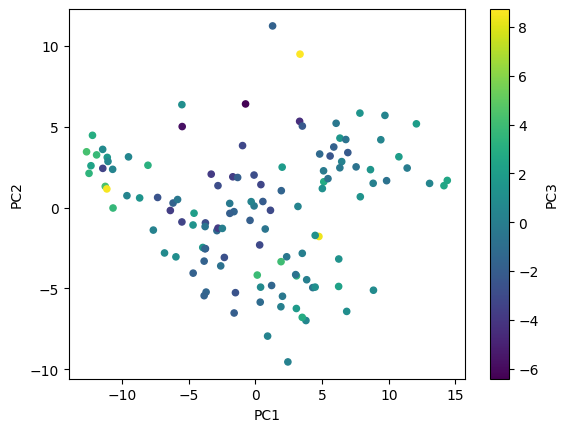

In [20]:
Xs_t.plot.scatter(x='PC1', y='PC2', c='PC3', sharex=False)

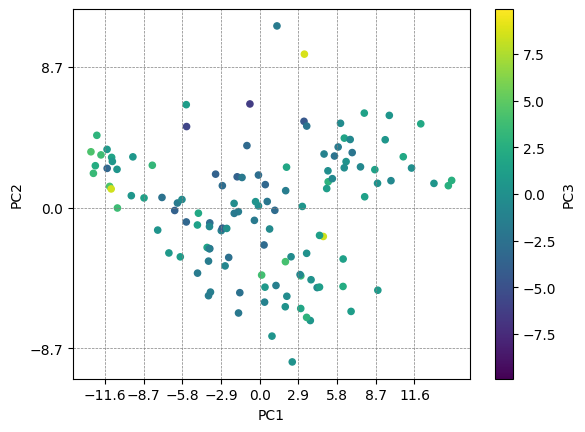

In [24]:
Xs_t.plot.scatter(x='PC1', y='PC2', c='PC3', sharex=False, vmin=-1/0.101, vmax=1/0.101)
x_ticks_vs = [-2.9*4 + 2.9*i for i in range(9)]
for v in x_ticks_vs:
    plt.axvline(v, c='gray', linestyle='--', linewidth=0.5)
plt.xticks(x_ticks_vs)

y_ticks_vs = [-8.7, 0, 8.7]
for v in y_ticks_vs:
    plt.axhline(v, c='gray', linestyle='--', linewidth=0.5)
plt.yticks(y_ticks_vs)
plt.show()

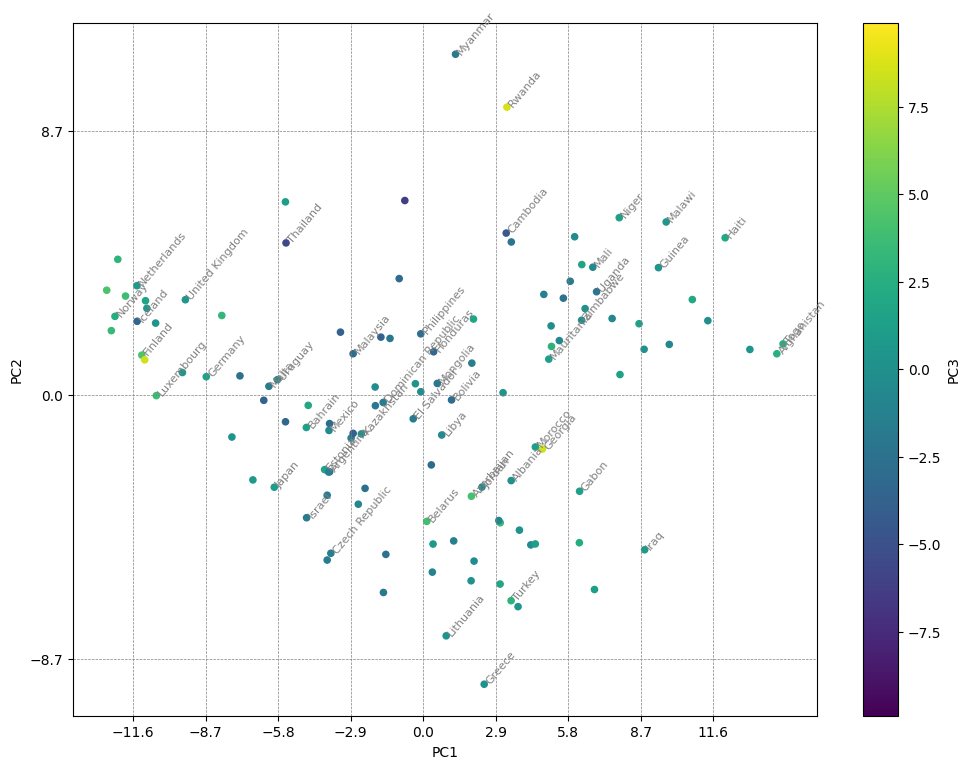

In [25]:
Xs_t.plot.scatter(x='PC1', y='PC2', c='PC3', sharex=False, vmin=-1/0.101, vmax=1/0.101, figsize=(12, 9))
x_ticks_vs = [-2.9*4 + 2.9*i for i in range(9)]
for v in x_ticks_vs:
    plt.axvline(v, c='gray', linestyle='--', linewidth=0.5)
plt.xticks(x_ticks_vs)

y_ticks_vs = [-8.7, 0, 8.7]
for v in y_ticks_vs:
    plt.axhline(v, c='gray', linestyle='--', linewidth=0.5)
plt.yticks(y_ticks_vs)

for i, row in Xs_t.sample(50).iterrows():
    plt.annotate(i, (row.PC1, row.PC2), rotation=50, c='gray', size=8)
plt.show()

In [26]:
master_data = '/home/sha/work/microbiome/data/master_tax.csv'
master = pd.read_csv(master_data)

In [28]:
master.describe()

,Unnamed: 0,Subject_ID,Visit_number,Age,g__Abiotrophia,g__Acidaminococcaceae_unclassified,g__Acidaminococcus,g__Acinetobacter,g__Actinobacillus,g__Actinomyces,...,g__Sutterella,g__Sutterellaceae_unclassified,g__Synergistes,g__T4likevirus,g__Tunalikevirus,g__Turicibacter,g__Varibaculum,g__Veillonella,g__Weissella,g__Wohlfahrtiimonas
count,8703.00000,8703.000000,8703.000000,8703.000000,8.703000e+03,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,...,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8.703000e+03
mean,4351.00000,3485.945996,17.476617,26.953809,5.170631e-08,0.000493,0.016353,0.000005,0.000067,0.000201,...,0.022025,0.006322,0.000704,0.001421,0.001498,0.000136,0.000052,0.041858,0.000011,7.893830e-07
std,2512.48403,1297.834068,8.255522,18.117068,3.763839e-06,0.012189,0.422597,0.000430,0.001884,0.012652,...,0.414869,0.291101,0.039652,0.132522,0.100861,0.005069,0.003801,0.876391,0.000735,7.364144e-05
min,0.00000,2014.000000,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2175.50000,2083.000000,11.000000,13.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,4351.00000,3031.000000,20.000000,19.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,6526.50000,4028.000000,25.000000,38.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
max,8702.00000,6038.000000,30.000000,76.000000,3.300000e-04,0.606900,25.465420,0.040140,0.091830,0.839860,...,26.375170,26.120140,2.889880,12.362960,7.851760,0.282150,0.334750,40.341380,0.065860,6.870000e-03


In [34]:
sub_genus = master.drop(['Unnamed: 0', 'Subject_ID', 'Visit_number', 'Age', 'Visit_ID', 'Sex', 'Race', 'Diagnosis'], axis=1)

In [35]:
sub_genus

,g__Abiotrophia,g__Acidaminococcaceae_unclassified,g__Acidaminococcus,g__Acinetobacter,g__Actinobacillus,g__Actinomyces,g__Adlercreutzia,g__Aerococcus,g__Aggregatibacter,g__Akkermansia,...,g__Sutterella,g__Sutterellaceae_unclassified,g__Synergistes,g__T4likevirus,g__Tunalikevirus,g__Turicibacter,g__Varibaculum,g__Veillonella,g__Weissella,g__Wohlfahrtiimonas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
Xs = sub_genus
Xs = (Xs - Xs.mean()) / Xs.std()
Xs

,g__Abiotrophia,g__Acidaminococcaceae_unclassified,g__Acidaminococcus,g__Acinetobacter,g__Actinobacillus,g__Actinomyces,g__Adlercreutzia,g__Aerococcus,g__Aggregatibacter,g__Akkermansia,...,g__Sutterella,g__Sutterellaceae_unclassified,g__Synergistes,g__T4likevirus,g__Tunalikevirus,g__Turicibacter,g__Varibaculum,g__Veillonella,g__Weissella,g__Wohlfahrtiimonas
0,-0.013738,-0.04043,-0.038695,-0.010719,-0.035495,-0.0159,-0.032753,-0.010719,-0.013109,-0.050938,...,-0.053089,-0.021719,-0.017764,-0.010719,-0.014853,-0.026774,-0.013655,-0.047762,-0.014508,-0.010719
1,-0.013738,-0.04043,-0.038695,-0.010719,-0.035495,-0.0159,-0.032753,-0.010719,-0.013109,-0.050938,...,-0.053089,-0.021719,-0.017764,-0.010719,-0.014853,-0.026774,-0.013655,-0.047762,-0.014508,-0.010719
2,-0.013738,-0.04043,-0.038695,-0.010719,-0.035495,-0.0159,-0.032753,-0.010719,-0.013109,-0.050938,...,-0.053089,-0.021719,-0.017764,-0.010719,-0.014853,-0.026774,-0.013655,-0.047762,-0.014508,-0.010719
3,-0.013738,-0.04043,-0.038695,-0.010719,-0.035495,-0.0159,-0.032753,-0.010719,-0.013109,-0.050938,...,-0.053089,-0.021719,-0.017764,-0.010719,-0.014853,-0.026774,-0.013655,-0.047762,-0.014508,-0.010719
4,-0.013738,-0.04043,-0.038695,-0.010719,-0.035495,-0.0159,-0.032753,-0.010719,-0.013109,-0.050938,...,-0.053089,-0.021719,-0.017764,-0.010719,-0.014853,-0.026774,-0.013655,-0.047762,-0.014508,-0.010719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,-0.013738,-0.04043,-0.038695,-0.010719,-0.035495,-0.0159,-0.032753,-0.010719,-0.013109,-0.050938,...,-0.053089,-0.021719,-0.017764,-0.010719,-0.014853,-0.026774,-0.013655,-0.047762,-0.014508,-0.010719
8699,-0.013738,-0.04043,-0.038695,-0.010719,-0.035495,-0.0159,-0.032753,-0.010719,-0.013109,-0.050938,...,-0.053089,-0.021719,-0.017764,-0.010719,-0.014853,-0.026774,-0.013655,-0.047762,-0.014508,-0.010719
8700,-0.013738,-0.04043,-0.038695,-0.010719,-0.035495,-0.0159,-0.032753,-0.010719,-0.013109,-0.050938,...,-0.053089,-0.021719,-0.017764,-0.010719,-0.014853,-0.026774,-0.013655,-0.047762,-0.014508,-0.010719
8701,-0.013738,-0.04043,-0.038695,-0.010719,-0.035495,-0.0159,-0.032753,-0.010719,-0.013109,-0.050938,...,-0.053089,-0.021719,-0.017764,-0.010719,-0.014853,-0.026774,-0.013655,-0.047762,-0.014508,-0.010719


In [39]:
pca.fit(Xs)
Xs_t = pd.DataFrame(pca.transform(Xs), index=Xs.index)
Xs_t.columns = Xs.columns

In [40]:
Xs_t

,g__Abiotrophia,g__Acidaminococcaceae_unclassified,g__Acidaminococcus,g__Acinetobacter,g__Actinobacillus,g__Actinomyces,g__Adlercreutzia,g__Aerococcus,g__Aggregatibacter,g__Akkermansia,...,g__Sutterella,g__Sutterellaceae_unclassified,g__Synergistes,g__T4likevirus,g__Tunalikevirus,g__Turicibacter,g__Varibaculum,g__Veillonella,g__Weissella,g__Wohlfahrtiimonas
0,6.980398,0.554135,0.005033,-0.433890,0.058045,0.081394,-0.317346,0.297836,0.073681,0.067869,...,8.779804e-15,-6.127067e-15,4.090947e-14,-1.147154e-14,-1.794580e-14,-3.821858e-15,1.191614e-15,7.207798e-15,3.081256e-14,1.660244
1,-0.356185,1.905388,0.004178,-0.301082,0.031517,0.042874,-0.153872,0.132349,0.029984,0.027146,...,4.373707e-17,-4.770514e-15,-4.167324e-15,8.791763e-15,1.980967e-15,-2.107870e-17,1.495190e-15,2.078221e-15,-1.429025e-14,-0.014294
2,-0.133947,-0.098390,-0.001420,0.144235,-0.027522,-0.041053,0.196010,-0.247056,-0.097533,-0.102351,...,-8.151776e-14,7.023373e-14,-2.236237e-13,4.153293e-14,3.006865e-13,-5.866167e-14,-5.390841e-14,-2.241781e-14,-1.815001e-14,0.031265
3,-0.289803,-0.224580,-0.003348,0.345184,-0.068733,-0.103464,0.511367,-0.689003,-0.322964,-0.364125,...,3.973995e-13,-5.103906e-14,-1.998627e-14,-2.091415e-13,-3.680512e-13,1.981824e-13,2.068535e-13,1.565658e-13,4.412030e-13,0.639828
4,-0.456458,-0.365399,-0.005569,0.580491,-0.119461,-0.181172,0.922276,-1.323876,-0.767255,-0.973903,...,3.771587e-13,-1.103406e-13,-2.727105e-13,-1.360871e-13,-4.736429e-13,2.940054e-13,2.247567e-13,1.227161e-13,3.542370e-13,1.250121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,-0.010183,-0.004888,-0.000057,0.005366,-0.000835,-0.001199,0.005022,-0.005165,-0.001438,-0.001362,...,5.743186e-14,-1.226625e-14,-1.767908e-14,2.010216e-14,1.159307e-14,-4.106352e-15,-2.921416e-15,-1.365919e-14,-2.203406e-14,-0.515294
8699,-0.045547,-0.030222,-0.000414,0.041148,-0.007414,-0.010934,0.050128,-0.058949,-0.020233,-0.020264,...,-1.447157e-13,1.963195e-13,4.423960e-13,1.804738e-14,-4.236334e-13,-3.670430e-13,-1.383463e-13,2.445442e-14,-2.813161e-14,-0.342137
8700,-0.016024,-0.009975,-0.000140,0.014232,-0.002854,-0.004337,0.022740,-0.038542,0.125211,0.026073,...,-4.402508e-16,1.717135e-16,-2.624611e-16,2.569238e-16,-7.061196e-16,6.554635e-16,-5.136193e-16,-3.902904e-16,-1.854020e-15,-0.494678
8701,-0.034655,-0.024179,-0.000347,0.035304,-0.006836,-0.010243,0.049916,-0.066102,-0.030483,-0.034334,...,-3.779493e-17,6.909379e-15,-3.711319e-14,-1.417084e-15,-1.372348e-14,-8.179402e-17,-1.575837e-14,-1.543902e-14,-4.055050e-14,-0.414818


In [41]:
total_variance = Xs_t.var().sum()
dic = {
    'variance_percentage': Xs_t.var() / total_variance,
    'cumulative_variance_percentage': Xs_t.var().cumsum() / total_variance
}
explanation_df = pd.DataFrame(dic)
explanation_df

,variance_percentage,cumulative_variance_percentage
g__Abiotrophia,0.006833,0.006833
g__Acidaminococcaceae_unclassified,0.006778,0.013611
g__Acidaminococcus,0.006760,0.020370
g__Acinetobacter,0.006753,0.027124
g__Actinobacillus,0.006740,0.033863
...,...,...
g__Turicibacter,0.006667,0.975060
g__Varibaculum,0.006667,0.981727
g__Veillonella,0.006667,0.988395
g__Weissella,0.006667,0.995062


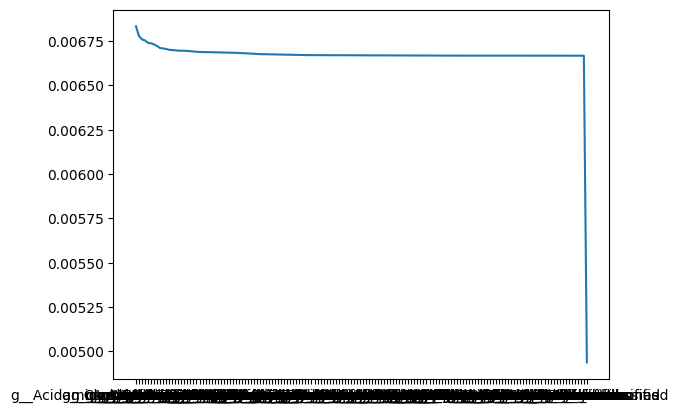

In [45]:
plt.plot(explanation_df['variance_percentage'])

In [46]:
master.isnull().sum()

Unnamed: 0             0
Subject_ID             0
Visit_number           0
Visit_ID               0
Age                    0
                      ..
g__Turicibacter        0
g__Varibaculum         0
g__Veillonella         0
g__Weissella           0
g__Wohlfahrtiimonas    0
Length: 158, dtype: int64

In [47]:
master.dropna(inplace=True)

In [48]:
master.duplicated().sum()

0

In [49]:
master.describe()

,Unnamed: 0,Subject_ID,Visit_number,Age,g__Abiotrophia,g__Acidaminococcaceae_unclassified,g__Acidaminococcus,g__Acinetobacter,g__Actinobacillus,g__Actinomyces,...,g__Sutterella,g__Sutterellaceae_unclassified,g__Synergistes,g__T4likevirus,g__Tunalikevirus,g__Turicibacter,g__Varibaculum,g__Veillonella,g__Weissella,g__Wohlfahrtiimonas
count,8703.00000,8703.000000,8703.000000,8703.000000,8.703000e+03,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,...,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8.703000e+03
mean,4351.00000,3485.945996,17.476617,26.953809,5.170631e-08,0.000493,0.016353,0.000005,0.000067,0.000201,...,0.022025,0.006322,0.000704,0.001421,0.001498,0.000136,0.000052,0.041858,0.000011,7.893830e-07
std,2512.48403,1297.834068,8.255522,18.117068,3.763839e-06,0.012189,0.422597,0.000430,0.001884,0.012652,...,0.414869,0.291101,0.039652,0.132522,0.100861,0.005069,0.003801,0.876391,0.000735,7.364144e-05
min,0.00000,2014.000000,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2175.50000,2083.000000,11.000000,13.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,4351.00000,3031.000000,20.000000,19.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,6526.50000,4028.000000,25.000000,38.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
max,8702.00000,6038.000000,30.000000,76.000000,3.300000e-04,0.606900,25.465420,0.040140,0.091830,0.839860,...,26.375170,26.120140,2.889880,12.362960,7.851760,0.282150,0.334750,40.341380,0.065860,6.870000e-03


In [50]:
genus_cols = master.columns
genus_cols

Index(['Unnamed: 0', 'Subject_ID', 'Visit_number', 'Visit_ID', 'Age', 'Sex',
       'Diagnosis', 'Race', 'g__Abiotrophia',
       'g__Acidaminococcaceae_unclassified',
       ...
       'g__Sutterella', 'g__Sutterellaceae_unclassified', 'g__Synergistes',
       'g__T4likevirus', 'g__Tunalikevirus', 'g__Turicibacter',
       'g__Varibaculum', 'g__Veillonella', 'g__Weissella',
       'g__Wohlfahrtiimonas'],
      dtype='object', length=158)

In [51]:
print(genus_cols)

Index(['Unnamed: 0', 'Subject_ID', 'Visit_number', 'Visit_ID', 'Age', 'Sex',
       'Diagnosis', 'Race', 'g__Abiotrophia',
       'g__Acidaminococcaceae_unclassified',
       ...
       'g__Sutterella', 'g__Sutterellaceae_unclassified', 'g__Synergistes',
       'g__T4likevirus', 'g__Tunalikevirus', 'g__Turicibacter',
       'g__Varibaculum', 'g__Veillonella', 'g__Weissella',
       'g__Wohlfahrtiimonas'],
      dtype='object', length=158)


In [52]:
type(genus_cols)

pandas.core.indexes.base.Index

In [56]:
genus_cols = master.columns
genus_cols = genus_cols.delete([0, 1, 2, 3, 4, 5, 6, 7])

In [57]:
genus_cols

Index(['g__Abiotrophia', 'g__Acidaminococcaceae_unclassified',
       'g__Acidaminococcus', 'g__Acinetobacter', 'g__Actinobacillus',
       'g__Actinomyces', 'g__Adlercreutzia', 'g__Aerococcus',
       'g__Aggregatibacter', 'g__Akkermansia',
       ...
       'g__Sutterella', 'g__Sutterellaceae_unclassified', 'g__Synergistes',
       'g__T4likevirus', 'g__Tunalikevirus', 'g__Turicibacter',
       'g__Varibaculum', 'g__Veillonella', 'g__Weissella',
       'g__Wohlfahrtiimonas'],
      dtype='object', length=150)

In [58]:
master

,Unnamed: 0,Subject_ID,Visit_number,Visit_ID,Age,Sex,Diagnosis,Race,g__Abiotrophia,g__Acidaminococcaceae_unclassified,...,g__Sutterella,g__Sutterellaceae_unclassified,g__Synergistes,g__T4likevirus,g__Tunalikevirus,g__Turicibacter,g__Varibaculum,g__Veillonella,g__Weissella,g__Wohlfahrtiimonas
0,0,3001,15,CSM5MCXD,43,Female,CD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3001,15,CSM5MCXD,43,Female,CD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3001,15,CSM5MCXD,43,Female,CD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3001,15,CSM5MCXD,43,Female,CD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,3001,15,CSM5MCXD,43,Female,CD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,8698,3022,30,CSMAHYLR,69,Male,nonIBD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8699,8699,3022,30,CSMAHYLR,69,Male,nonIBD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8700,8700,3022,30,CSMAHYLR,69,Male,nonIBD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8701,8701,3022,30,CSMAHYLR,69,Male,nonIBD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/home/sha/work/_p310/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


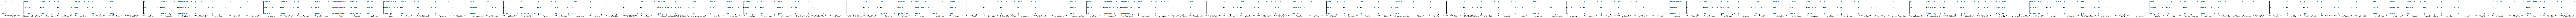

In [60]:
sns.pairplot(master, x_vars=genus_cols, y_vars=['Diagnosis']) #, height=5, aspect=1)

/home/sha/work/_p310/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


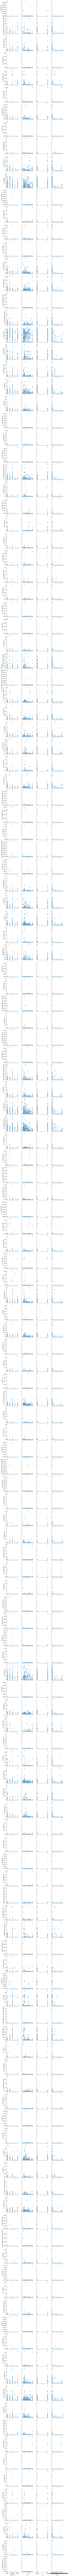

In [62]:
sns.pairplot(master, x_vars=['Subject_ID', 'Age', 'Sex', 'Race'], y_vars=genus_cols)

In [63]:
from sklearn.feature_selection import SelectKBest, f_classif

In [75]:
master.columns
# for genus in genus_cols:
#     print(genus)
X = master.iloc[:, 8:]
y = master['Diagnosis']

In [76]:
X

,g__Abiotrophia,g__Acidaminococcaceae_unclassified,g__Acidaminococcus,g__Acinetobacter,g__Actinobacillus,g__Actinomyces,g__Adlercreutzia,g__Aerococcus,g__Aggregatibacter,g__Akkermansia,...,g__Sutterella,g__Sutterellaceae_unclassified,g__Synergistes,g__T4likevirus,g__Tunalikevirus,g__Turicibacter,g__Varibaculum,g__Veillonella,g__Weissella,g__Wohlfahrtiimonas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)

SelectKBest()

In [78]:
top_microbes = X.columns[selector.get_support()]
print(top_microbes)

Index(['g__Alistipes', 'g__Butyrivibrio', 'g__Clostridiaceae_noname',
       'g__Clostridium', 'g__Collinsella', 'g__Dorea', 'g__Gordonibacter',
       'g__Odoribacter', 'g__Oscillibacter', 'g__Phascolarctobacterium'],
      dtype='object')


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [82]:
X = master[top_microbes]
y = master['Diagnosis']

model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, X, y, cv=5)
print(scores.mean())


0.45030409264064114


In [83]:
master

,Unnamed: 0,Subject_ID,Visit_number,Visit_ID,Age,Sex,Diagnosis,Race,g__Abiotrophia,g__Acidaminococcaceae_unclassified,...,g__Sutterella,g__Sutterellaceae_unclassified,g__Synergistes,g__T4likevirus,g__Tunalikevirus,g__Turicibacter,g__Varibaculum,g__Veillonella,g__Weissella,g__Wohlfahrtiimonas
0,0,3001,15,CSM5MCXD,43,Female,CD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3001,15,CSM5MCXD,43,Female,CD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3001,15,CSM5MCXD,43,Female,CD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3001,15,CSM5MCXD,43,Female,CD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,3001,15,CSM5MCXD,43,Female,CD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,8698,3022,30,CSMAHYLR,69,Male,nonIBD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8699,8699,3022,30,CSMAHYLR,69,Male,nonIBD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8700,8700,3022,30,CSMAHYLR,69,Male,nonIBD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8701,8701,3022,30,CSMAHYLR,69,Male,nonIBD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
master['Race'].unique()

array(['White', 'Black/White', 'Black or African American', 'Brazilian',
       'White and African American', 'Hispanic/Latino & African American',
       'American Indian or Alaska Native', 'Portugese and Cape Verdean',
       'Hispanic or Latino'], dtype=object)

In [88]:
m1 = master
m1['Sex'] = m1['Sex'].map({'Male': 0, 'Female': 1})
m1['Race'] = m1['Race'].map({'White': 0, 'Black/White': 1, 'Black or African American': 2, 'Brazilian': 3,
       'White and African American': 4, 'Hispanic/Latino & African American': 5,
       'American Indian or Alaska Native': 6, 'Portugese and Cape Verdean': 7,
       'Hispanic or Latino': 8})

In [89]:
m1

,Unnamed: 0,Subject_ID,Visit_number,Visit_ID,Age,Sex,Diagnosis,Race,g__Abiotrophia,g__Acidaminococcaceae_unclassified,...,g__Sutterella,g__Sutterellaceae_unclassified,g__Synergistes,g__T4likevirus,g__Tunalikevirus,g__Turicibacter,g__Varibaculum,g__Veillonella,g__Weissella,g__Wohlfahrtiimonas
0,0,3001,15,CSM5MCXD,43,1,CD,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3001,15,CSM5MCXD,43,1,CD,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3001,15,CSM5MCXD,43,1,CD,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3001,15,CSM5MCXD,43,1,CD,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,3001,15,CSM5MCXD,43,1,CD,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,8698,3022,30,CSMAHYLR,69,0,nonIBD,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8699,8699,3022,30,CSMAHYLR,69,0,nonIBD,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8700,8700,3022,30,CSMAHYLR,69,0,nonIBD,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8701,8701,3022,30,CSMAHYLR,69,0,nonIBD,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
X = m1.iloc[:, 8:]
y= m1['Diagnosis']

In [91]:
X

,g__Abiotrophia,g__Acidaminococcaceae_unclassified,g__Acidaminococcus,g__Acinetobacter,g__Actinobacillus,g__Actinomyces,g__Adlercreutzia,g__Aerococcus,g__Aggregatibacter,g__Akkermansia,...,g__Sutterella,g__Sutterellaceae_unclassified,g__Synergistes,g__T4likevirus,g__Tunalikevirus,g__Turicibacter,g__Varibaculum,g__Veillonella,g__Weissella,g__Wohlfahrtiimonas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [93]:
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X, y)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=2222)

In [96]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [97]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.4462952326249282
